 # Travail de : GOHOUEDE Aimé Loick

# Exercice 1 : Segmentation d'images : Approche Régions
   1-a  Lire et afficher l’image ; puis tester l’algorithme flood fill sur cette image.

In [1]:
import cv2
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
#image
image_path = 'Aime.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

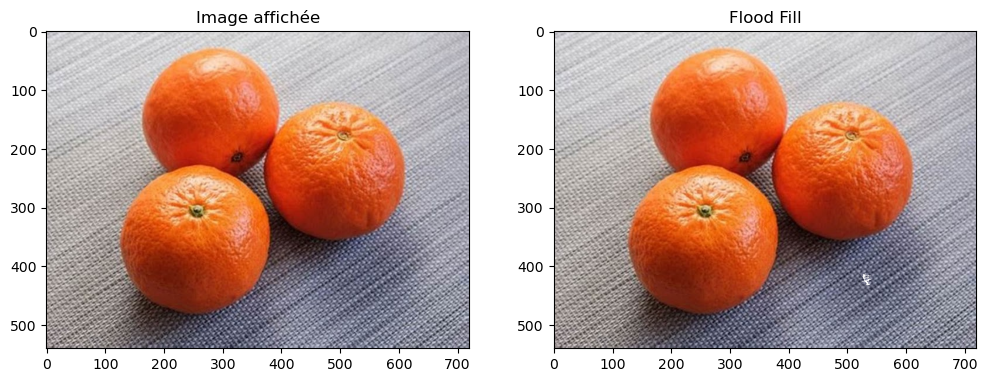

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image affichée')

# Nous définirons un masque pour le remplissage
# Obtenir les dimensions de l'image
height, width, _ = image.shape

mask = np.zeros((height+2, width+2), np.uint8)

# Démarrage du remplissage avec définition d'un point de départ
random.seed(4444)
x = random.randint(0, width-1)
y = random.randint(0, height-1)
start_point = (x, y)

# Couleur pour le remplissage et limites de couleurs
fill_color = (255, 255, 255) # J'ai choisi le blanc
lower_diff = (10, 10, 10)
upper_diff = (10, 10, 10)

flood_fill = cv2.floodFill(image, mask, start_point, fill_color, lower_diff,
                           upper_diff)

plt.subplot(1, 2, 2)
plt.imshow(flood_fill[1])
plt.title('Flood Fill')
plt.show()

# 2-a
Transformer l’image en image en niveaux de gris et en extraire son histogramme.

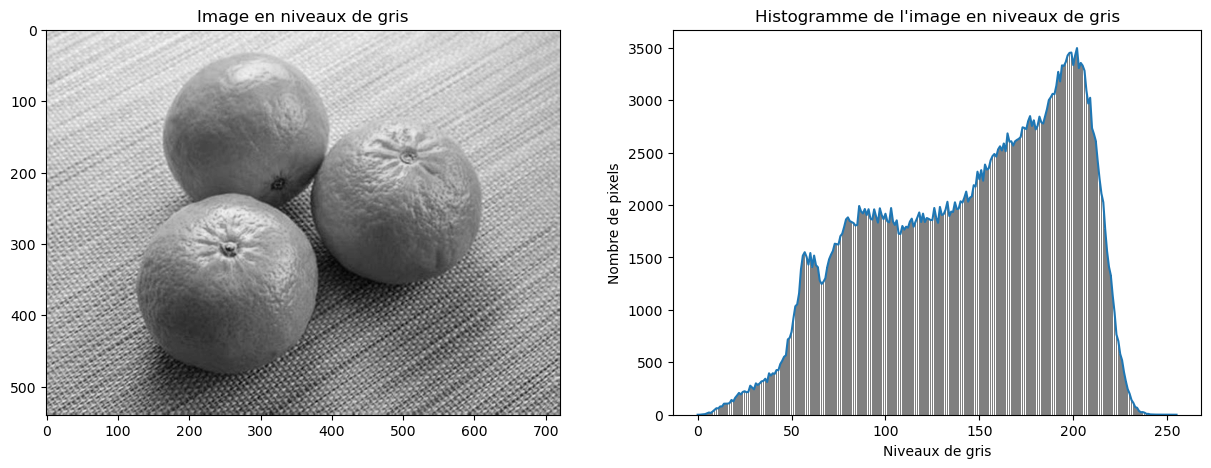

In [4]:
def gris_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image

gris_echelle_image = gris_image(image_path)

# Histogramme
histogram = cv2.calcHist([gris_echelle_image], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(gris_echelle_image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(1, 2, 2)
plt.bar(range(256), histogram[:,0], color='gray')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')
plt.plot(histogram)

plt.show()

# b. 
Binariser l’image en niveaux de gris de telle sorte à obtenir des objets en blanc et un fond en noir.

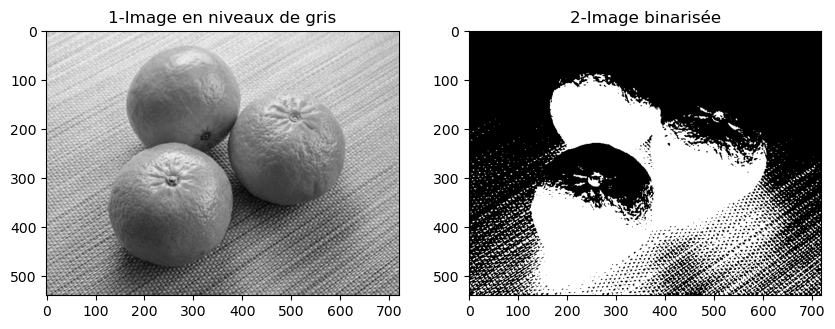

In [5]:
def binaire_image(image_path):
    # Appliquer un seuillage pour binariser l'image
    gris_echelle_image = gris_image(image_path)
    _, binary_image = cv2.threshold(gris_echelle_image, 130, 255,
                                    cv2.THRESH_BINARY)
    binary_image = cv2.bitwise_not(binary_image)

    return binary_image

image_bin = binaire_image(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gris_echelle_image, cmap='gray')
plt.title('1-Image en niveaux de gris')

plt.subplot(1, 2, 2)
plt.imshow(image_bin, cmap='gray')
plt.title('2-Image binarisée')

plt.show()

# Commenter et comparer les résultats

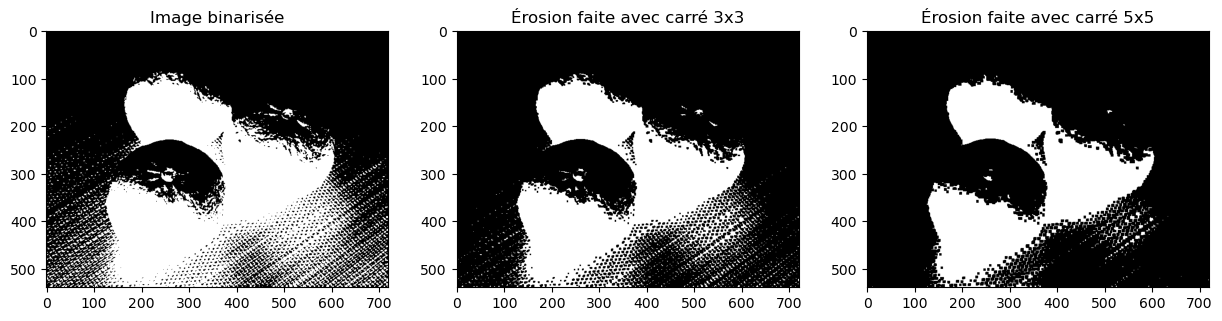

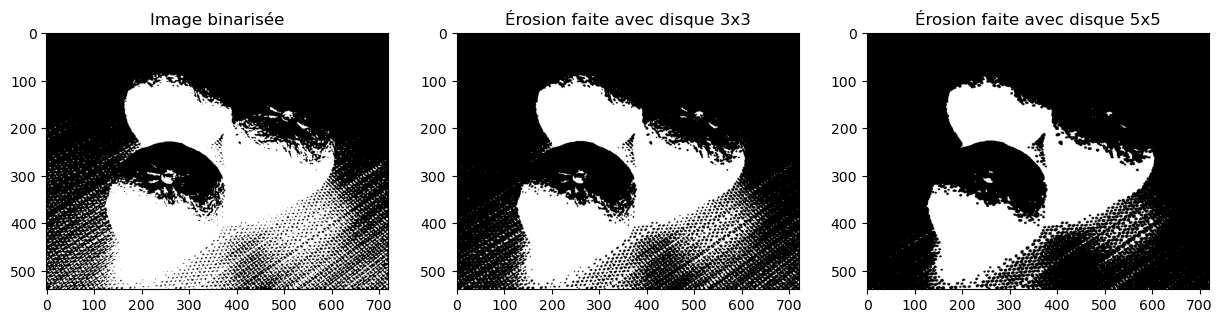

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def carre_erosion(binary_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    image_erosion = cv2.erode(binary_image, kernel, iterations=1)
    return image_erosion

def disque_erosion(binary_image, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
     (kernel_size, kernel_size))
    image_erosion = cv2.erode(binary_image, kernel, iterations=1)
    return image_erosion

binary_image = binaire_image(image_path)

carre_erosion_33 = carre_erosion(binary_image, 3)
carre_erosion_55 = carre_erosion(binary_image, 5)
disque_erosion_33 = disque_erosion(binary_image, 3)
disque_erosion_55 = disque_erosion(binary_image, 5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Image binarisée')

plt.subplot(1, 3, 2)
plt.imshow(carre_erosion_33, cmap='gray')
plt.title('Érosion faite avec carré 3x3')

plt.subplot(1, 3, 3)
plt.imshow(carre_erosion_55, cmap='gray')
plt.title('Érosion faite avec carré 5x5')

plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Image binarisée')

plt.subplot(1, 3, 2)
plt.imshow(disque_erosion_33, cmap='gray')
plt.title('Érosion faite avec disque 3x3')

plt.subplot(1, 3, 3)
plt.imshow(disque_erosion_55, cmap='gray')
plt.title('Érosion faite avec disque 5x5')

plt.show()

# Comparaison et remarques
Les couleurs présente dans l'image empege d'avoir une image binaire , le mieux serait d'utiliser d'autres approches .L'erosion avec disque et l'erosion avec carré quelque soit la taille parait donner les meme visualisation.

d.
Appliquer une dilatation sur l’image binaire en utilisant les éléments structurants utilisés dans la question précédente. Commenter et comparer les résultats

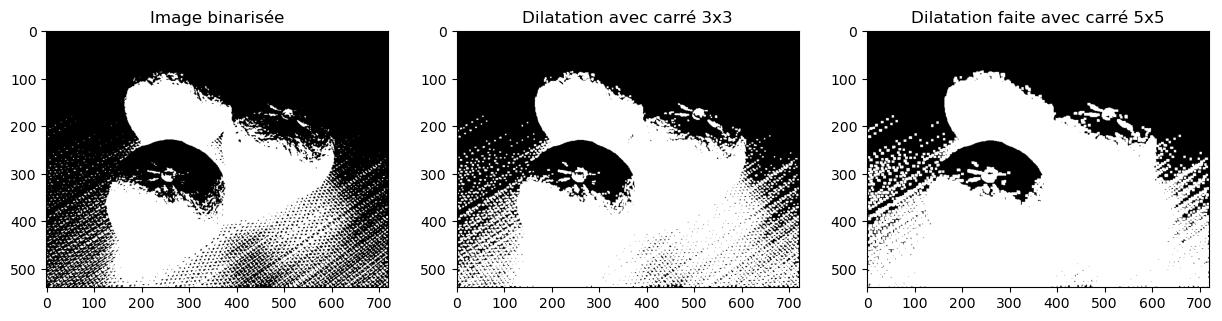

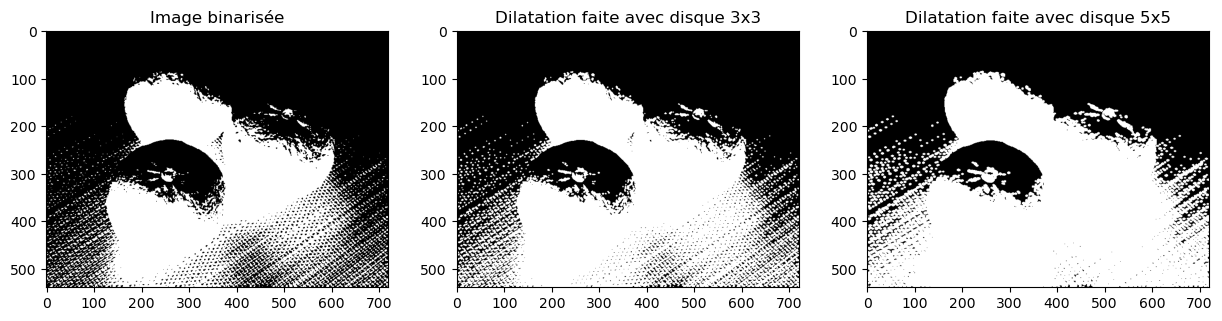

In [9]:
def carre_dilatation(binary_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    image_dilatee = cv2.dilate(binary_image, kernel, iterations=1)
    return image_dilatee

def disque_dilatation(binary_image, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
     (kernel_size, kernel_size))
    image_dilatee = cv2.dilate(binary_image, kernel, iterations=1)
    return image_dilatee

binary_image = binaire_image(image_path)

carre_dilatation_33 = carre_dilatation(binary_image, 3)
carre_dilatation_55 = carre_dilatation(binary_image, 5)
disque_dilatation_33 = disque_dilatation(binary_image, 3)
disque_dilatation_55 = disque_dilatation(binary_image, 5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Image binarisée')

plt.subplot(1, 3, 2)
plt.imshow(carre_dilatation_33, cmap='gray')
plt.title('Dilatation avec carré 3x3')

plt.subplot(1, 3, 3)
plt.imshow(carre_dilatation_55, cmap='gray')
plt.title('Dilatation faite avec carré 5x5')

plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Image binarisée')

plt.subplot(1, 3, 2)
plt.imshow(disque_dilatation_33, cmap='gray')
plt.title('Dilatation faite avec disque 3x3')

plt.subplot(1, 3, 3)
plt.imshow(disque_dilatation_55, cmap='gray')
plt.title('Dilatation faite avec disque 5x5')

plt.show()

Meme constat que la question précédente , seulement la dilatation faite avec disque 5x5 est moins adaptée que celle de 3x3

# Exercice 2: 
Approche Frontières différentes approches (Sobel, Canny, Roberts, Prewitts...) peuvent être utilisées pour détecter les contours dans une image en niveau de gris.

Ressources: - Python OpenCV – Roberts Edge Detection

Sobel and Canny edge detection using Python
Détecter les contours sur l’image par une approche de type Sobel.

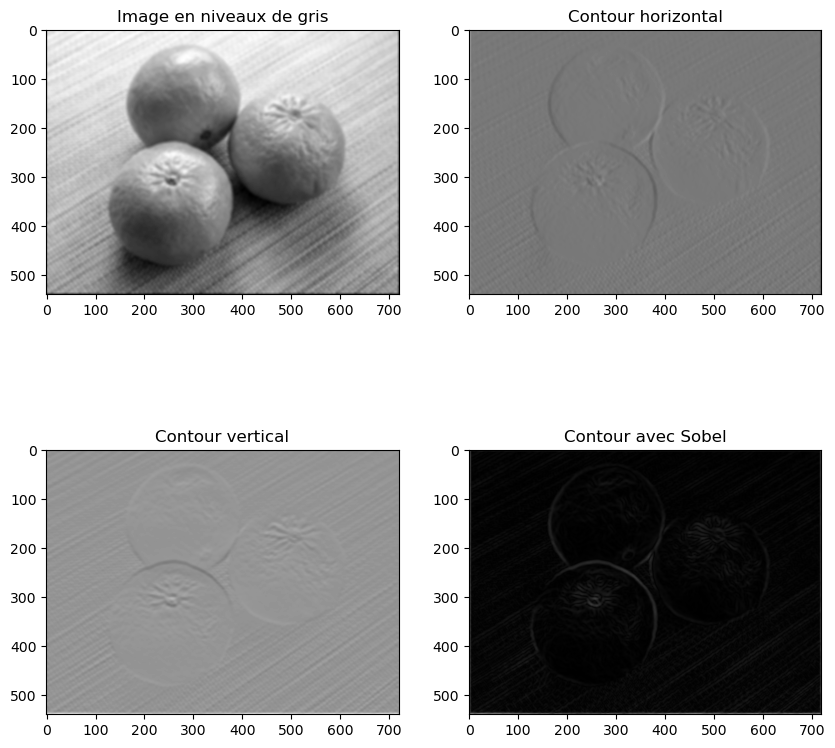

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        #print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        pass
        

    """if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()"""

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height),
                             image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height,
                 pad_width:padded_image.shape[1] - pad_width] = image

    """if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()"""

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row +
            kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    #print("Output Image size : {}".format(output.shape))

    """if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row,
                                                           kernel_col))
        plt.show()"""

    return output

def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def kernel_gaussien(size, sigma=1., verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    """if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()"""

    return kernel_2D

def blur_gaussien(image, kernel_size, verbose=False):
    kernel = kernel_gaussien(kernel_size, sigma=math.sqrt(kernel_size),
                             verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image en niveaux de gris')


    plt.subplot(2, 2, 2)
    plt.imshow(new_image_x, cmap='gray')
    plt.title("Contour horizontal")

    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)


    plt.subplot(2, 2, 3)
    plt.imshow(new_image_y, cmap='gray')
    plt.title("Contour vertical")

    gradient_magnitude = np.sqrt(np.square(new_image_x) +
                                 np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()


    plt.subplot(2, 2, 4)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Contour avec Sobel")
    plt.show()

    return gradient_magnitude

filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

image = cv2.imread(image_path)
image = blur_gaussien(image, 9, verbose=True)
_ = sobel_edge_detection(image, filter, verbose=True)

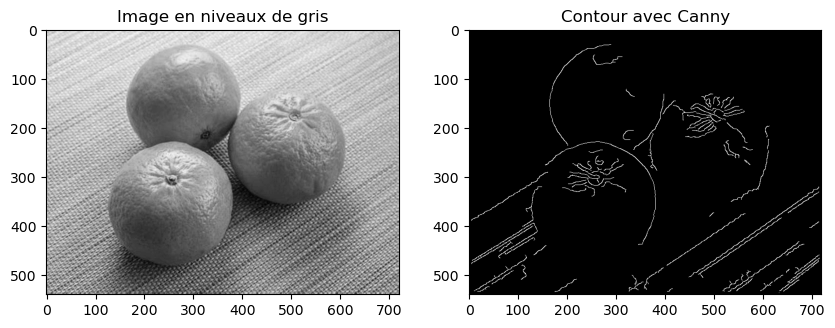

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def sobel_edge_detection_for_canny(image, filter, convert_to_degree=False,
                                   verbose=False):
    new_image_x = convolution(image, filter, verbose)

    """if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Bord Horizontal")
        plt.show()"""

    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)

    """if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Bord vertical")
        plt.show()"""

    gradient_magnitude = np.sqrt(np.square(new_image_x) +
                                 np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    """if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()"""

    gradient_direction = np.arctan2(new_image_y, new_image_x)

    if convert_to_degree:
        gradient_direction = np.rad2deg(gradient_direction)
        gradient_direction += 180

    return gradient_magnitude, gradient_direction


def non_max_suppression(gradient_magnitude, gradient_direction, verbose):
    image_row, image_col = gradient_magnitude.shape

    output = np.zeros(gradient_magnitude.shape)

    PI = 180

    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            direction = gradient_direction[row, col]

            # (0 - PI/8 and 15PI/8 - 2PI)
            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = gradient_magnitude[row, col - 1]
                after_pixel = gradient_magnitude[row, col + 1]

            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = gradient_magnitude[row + 1, col - 1]
                after_pixel = gradient_magnitude[row - 1, col + 1]

            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = gradient_magnitude[row - 1, col]
                after_pixel = gradient_magnitude[row + 1, col]

            else:
                before_pixel = gradient_magnitude[row - 1, col - 1]
                after_pixel = gradient_magnitude[row + 1, col + 1]

            if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
                output[row, col] = gradient_magnitude[row, col]

    """if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Non Max Suppression")
        plt.show()"""

    return output


def threshold(image, low, high, weak, verbose=False):
    output = np.zeros(image.shape)

    strong = 255

    strong_row, strong_col = np.where(image >= high)
    weak_row, weak_col = np.where((image <= high) & (image >= low))

    output[strong_row, strong_col] = strong
    output[weak_row, weak_col] = weak

    """if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("threshold")
        plt.show()"""

    return output


def hysteresis(image, weak):
    image_row, image_col = image.shape

    top_to_bottom = image.copy()

    for row in range(1, image_row):
        for col in range(1, image_col):
            if top_to_bottom[row, col] == weak:
                if top_to_bottom[row, col + 1] == 255 or top_to_bottom[row, col - 1] == 255 or top_to_bottom[row - 1, col] == 255 or top_to_bottom[
                    row + 1, col] == 255 or top_to_bottom[
                    row - 1, col - 1] == 255 or top_to_bottom[row + 1, col - 1] == 255 or top_to_bottom[row - 1, col + 1] == 255 or top_to_bottom[
                    row + 1, col + 1] == 255:
                    top_to_bottom[row, col] = 255
                else:
                    top_to_bottom[row, col] = 0

    bottom_to_top = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(image_col - 1, 0, -1):
            if bottom_to_top[row, col] == weak:
                if bottom_to_top[row, col + 1] == 255 or bottom_to_top[row, col - 1] == 255 or bottom_to_top[row - 1, col] == 255 or bottom_to_top[
                    row + 1, col] == 255 or bottom_to_top[
                    row - 1, col - 1] == 255 or bottom_to_top[row + 1, col - 1] == 255 or bottom_to_top[row - 1, col + 1] == 255 or bottom_to_top[
                    row + 1, col + 1] == 255:
                    bottom_to_top[row, col] = 255
                else:
                    bottom_to_top[row, col] = 0

    right_to_left = image.copy()

    for row in range(1, image_row):
        for col in range(image_col - 1, 0, -1):
            if right_to_left[row, col] == weak:
                if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
                    row + 1, col] == 255 or right_to_left[
                    row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
                    row + 1, col + 1] == 255:
                    right_to_left[row, col] = 255
                else:
                    right_to_left[row, col] = 0

    left_to_right = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(1, image_col):
            if left_to_right[row, col] == weak:
                if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
                    row + 1, col] == 255 or left_to_right[
                    row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
                    row + 1, col + 1] == 255:
                    left_to_right[row, col] = 255
                else:
                    left_to_right[row, col] = 0

    final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right

    final_image[final_image > 255] = 255

    return final_image



image = cv2.imread(image_path)

blurred_image = blur_gaussien(image, kernel_size=9, verbose=False)

edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

gradient_magnitude, gradient_direction = sobel_edge_detection_for_canny(blurred_image, edge_filter, convert_to_degree=True, verbose=True)

new_image = non_max_suppression(gradient_magnitude, gradient_direction, verbose=True)

weak = 50

new_image = threshold(new_image, 5, 20, weak=weak, verbose=True)

new_image = hysteresis(new_image, weak)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gris_echelle_image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title("Contour avec Canny")
plt.show()

3- Détecter les contours sur l’image par une approche de type Roberts

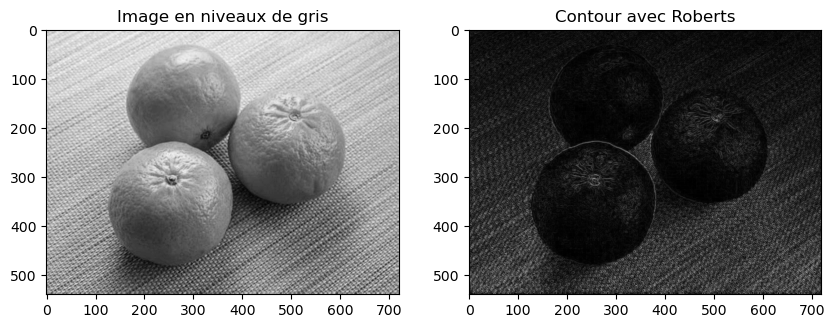

In [13]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

roberts_cross_ver = np.array([[1, 0],
                            [0,-1]])

roberts_cross_hor = np.array([[0, 1],
                            [-1, 0]])

img = cv2.imread(image_path, 0).astype('float64')
img /= 255.0
vertical = ndimage.convolve(img, roberts_cross_ver)
horizontal = ndimage.convolve(img, roberts_cross_hor)

edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img *= 255

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gris_echelle_image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(1, 2, 2)
plt.imshow(edged_img, cmap='gray')
plt.title('Contour avec Roberts')
plt.show()

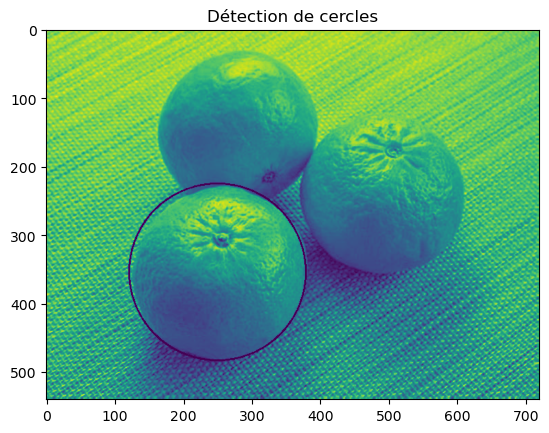

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

blur_image = cv2.GaussianBlur(image, (9, 9), 2)

circles = cv2.HoughCircles(blur_image, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                           param1=145, param2=20, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)

    plt.imshow(image)
    plt.title("Détection de cercles")
    plt.show()
else:
    print("Aucun cercle n'a été détecté sur l'image.")

# Conclusion
On l'a deja constaté depuis le contours avec Robert (question precédente ) un seul fruit détecté sur 3 on peut expliquer ca pas les remarque notée  dans ce rapport .


# Fin